In [1]:
# importation de pandas
from pandas import read_csv, concat
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
# insertion du fichier csv train dans un dataframe
df_train_full = read_csv( './csv/train.csv' )
train_boost = read_csv( './csv/train.csv' )
df_test = read_csv('./csv/test.csv')
y_train = train_boost.SalePrice.values.astype(int)

pd.options.display.max_columns = None

In [3]:
# utilisation de fillna pour changer toutes les valeurs nan d'une colonne en 0
df_train_full['Alley'] = df_train_full['Alley'].fillna("none")
df_test['Alley'] = df_test['Alley'].fillna("none")
train_boost['Alley'] = train_boost['Alley'].fillna("none")

df_train_full['FireplaceQu'] = df_train_full['FireplaceQu'].fillna("none")
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna("none")
train_boost['FireplaceQu'] = train_boost['FireplaceQu'].fillna("none")

df_train_full['PoolQC'] = df_train_full['PoolQC'].fillna("none")
df_test['PoolQC'] = df_test['PoolQC'].fillna("none")
train_boost['PoolQC'] = train_boost['PoolQC'].fillna("none")

df_train_full['Fence'] = df_train_full['Fence'].fillna("none")
df_test['Fence'] = df_test['Fence'].fillna("none")
train_boost['Fence'] = train_boost['Fence'].fillna("none")

df_train_full['MiscFeature'] = df_train_full['MiscFeature'].fillna("none")
df_test['MiscFeature'] = df_test['MiscFeature'].fillna("none")
train_boost['MiscFeature'] = train_boost['MiscFeature'].fillna("none")

In [4]:
df_train_full = df_train_full.fillna(0)
df_test = df_test.fillna(0)
train_boost = train_boost.fillna(0)

del train_boost['SalePrice']
del train_boost['Id']

In [5]:
# différenciation catégorielle / quantitative train full
cat_train = df_train_full.select_dtypes(include=['object'])
x_quant_train = df_train_full.select_dtypes(exclude=['object'])

# différenciation catégorielle / quantitative test
cat_test = df_test.select_dtypes(include=['object'])
x_quant_test = df_test.select_dtypes(exclude=['object'])

cat_all = cat_train.append(cat_test)
x_cat_all = pd.get_dummies(cat_all)
x_cat_train = x_cat_all[:1460]
x_cat_test = x_cat_all[1460:]

df_train_full = pd.concat([x_cat_train, x_quant_train], axis=1)
df_test = pd.concat([x_cat_test, x_quant_test], axis=1)

# différenciation catégorielle / quantitative boost
cat = train_boost.select_dtypes(include=['object'])
x_quant = train_boost.select_dtypes(exclude=['object'])
x_cat = pd.get_dummies(cat)
train_boost = pd.concat([x_cat, x_quant], axis=1)

xgb = XGBRegressor()

lin_reg = xgb.fit(train_boost, y_train)

var_gain = xgb.get_booster().get_score(importance_type='gain')
var_gain

var_order = sorted(var_gain, key=lambda colonnes: colonnes[1])
# var_order[1:30]
train_full = pd.concat([df_train_full[var_order], df_train_full['SalePrice']], axis=1)
train_full

#etude de la correlation
fig = plt.figure(1, figsize = (20, 20))
matrice_corr = train_full.corr().round(1)
sns.heatmap(data = matrice_corr)

In [8]:
#créer un objet reg lin
modeleReg = LinearRegression()
train_full = df_train_full

#créer y et X
list_var = train_full.columns.drop("SalePrice")
y = train_full.SalePrice
X = train_full[list_var]

modeleReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

X = df_train_full[list_var]
X

-110806.00073967813
[ 1.63633376e-07 -2.03370305e+04  1.23773438e+04  1.97577481e+03
  4.64774491e+03  1.33616670e+03 -1.66319557e+04  1.66319557e+04
  6.82156448e+02 -6.80805205e+01 -6.14075939e+02 -3.09821774e+03
  1.85755646e+03  2.66371311e+03 -1.42305181e+03 -4.08645742e+02
  7.15914850e+03 -1.17873818e+04  5.03687908e+03 -2.71932208e-07
  1.83076274e+04 -1.83076274e+04  3.83436845e+03  1.16857963e+04
 -4.06661561e+03 -1.36539300e+04  2.20038086e+03  1.16081366e+04
  1.90655440e+04 -3.06736806e+04  3.07439878e+03  1.01666857e+04
  3.63237733e+02 -2.75569275e+03 -1.15166748e+04 -7.17153993e+03
  1.47437130e+04 -1.84682388e+04 -8.21258648e+03 -8.98468679e+03
 -4.07508338e+03 -1.80341529e+04 -1.43216837e+04  1.64897970e+04
 -1.44753593e+04  2.83505470e+04  2.13617317e+04 -1.12819866e+04
 -5.84976378e+03 -8.00904613e+03  1.92300702e+02  5.80105937e+02
  4.22221209e+04 -7.25672481e+03  2.86858166e+03 -6.02793678e+03
  1.08875304e+03  1.03078713e+04  4.29586441e+03  9.05688863e+03
 -2.1

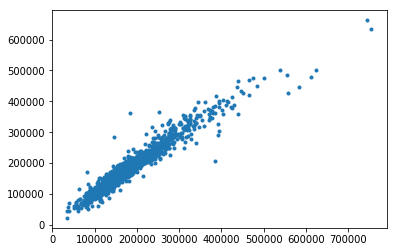

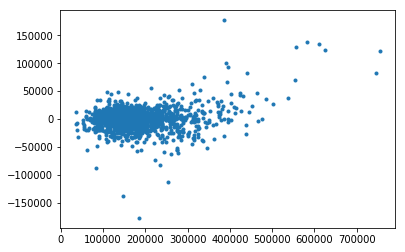

In [11]:
print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE = np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

del df_train_full['TotalBsmtSF']
del df_train_full['GrLivArea']
del df_train_full['BsmtHalfBath']
del df_train_full['HalfBath']
del df_train_full['BedroomAbvGr']
del df_train_full['GarageArea']
del df_train_full['MoSold']
del df_train_full['YrSold']
del df_train_full['OpenPorchSF']
del df_train_full['EnclosedPorch']

del df_test['TotalBsmtSF']
del df_test['GrLivArea']
del df_test['BsmtHalfBath']
del df_test['HalfBath']
del df_test['BedroomAbvGr']
del df_test['GarageArea']
del df_test['MoSold']
del df_test['YrSold']
del df_test['OpenPorchSF']
del df_test['EnclosedPorch']

display(df_train_full.head())

In [12]:
train_full.to_csv('./csv/train_modif.csv')
df_test.to_csv('./csv/test_modif.csv')